## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [20]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [21]:
train, test = keras.datasets.cifar10.load_data()

In [22]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [23]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8]

In [18]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 98us/step - loss: 5.9786 - acc: 0.2812 - val_loss: 5.7807 - val_acc: 0.3508
Epoch 2/50
50000/50000 [==============================] - 5s 96us/step - loss: 5.6927 - acc: 0.3729 - val_loss: 5.6232 - val_acc: 0.3853
Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 5.5482 - acc: 0.4016 - val_loss: 5.4900 - val_acc: 0.4092
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 5.4286 - acc: 0.4226 - val_loss: 5.3786 - val_acc: 0.4232
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 5.3225 - acc: 0.4365 - val_loss: 5.2808 - val_acc: 0.4350
Epoch 6/50
50000/50000 [==============================] - 5s 95us/step - loss: 5.2218 - acc: 0.4488 - val_loss: 5.1950 - val_acc: 0.4450
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 5.1291 - acc: 0.4595 - val_loss: 5.0928 - val_acc

50000/50000 [==============================] - 5s 96us/step - loss: 1.8087 - acc: 0.3686 - val_loss: 1.7691 - val_acc: 0.3762
Epoch 3/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.7244 - acc: 0.3948 - val_loss: 1.6963 - val_acc: 0.4059
Epoch 4/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6658 - acc: 0.4149 - val_loss: 1.6449 - val_acc: 0.4207
Epoch 5/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6206 - acc: 0.4331 - val_loss: 1.6282 - val_acc: 0.4290
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5822 - acc: 0.4441 - val_loss: 1.5774 - val_acc: 0.4489
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5483 - acc: 0.4561 - val_loss: 1.5460 - val_acc: 0.4575
Epoch 8/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5182 - acc: 0.4675 - val_loss: 1.5240 - val_acc: 0.4637
Epoch 9/50
50000/50000 [============================

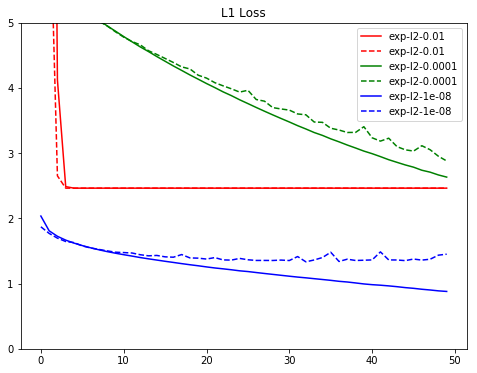

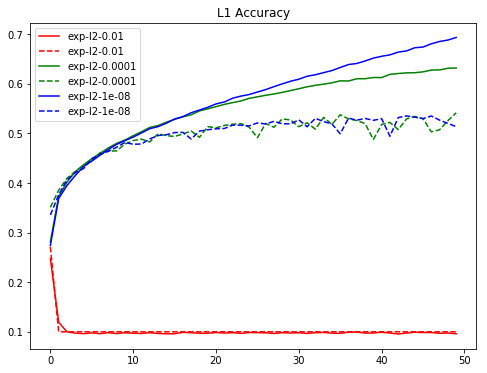

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("L1 Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("L1 Accuracy")
plt.legend()
plt.show()

l1_l2

In [24]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [25]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8]

In [26]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 120us/step - loss: 18.8181 - acc: 0.2671 - val_loss: 17.3629 - val_acc: 0.3468
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 16.1497 - acc: 0.3595 - val_loss: 14.9823 - val_acc: 0.3784
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 13.9650 - acc: 0.3818 - val_loss: 12.9798 - val_acc: 0.3913
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 12.1174 - acc: 0.3935 - val_loss: 11.2806 - val_acc: 0.3999
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 10.5458 - acc: 0.4027 - val_loss: 9.8337 - val_acc: 0.4106
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 9.2089 - acc: 0.4082 - val_loss: 8.6077 - val_acc: 0.4047
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 8.0685 - acc: 0.4148 - val_loss: 

Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 13.0350 - acc: 0.3545 - val_loss: 12.1446 - val_acc: 0.3636
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 11.3605 - acc: 0.3766 - val_loss: 10.6110 - val_acc: 0.3850
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 9.9459 - acc: 0.3906 - val_loss: 9.3081 - val_acc: 0.3947
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 8.7426 - acc: 0.4046 - val_loss: 8.1992 - val_acc: 0.4123
Epoch 6/50
50000/50000 [==============================] - 6s 111us/step - loss: 7.7176 - acc: 0.4120 - val_loss: 7.2627 - val_acc: 0.4150
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 6.8428 - acc: 0.4207 - val_loss: 6.4438 - val_acc: 0.4246
Epoch 8/50
50000/50000 [==============================] - 6s 119us/step - loss: 6.0968 - acc: 0.4253 - val_loss: 5.7657 - val_acc: 0.4290
Epoch 9/50
50000/50000 [======

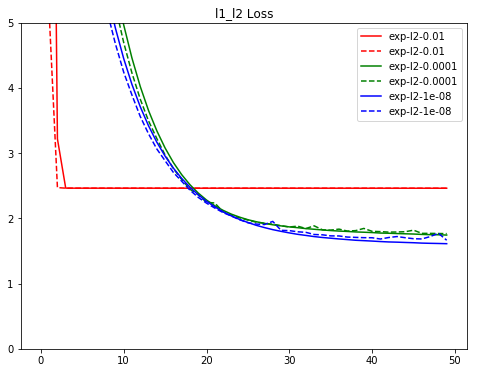

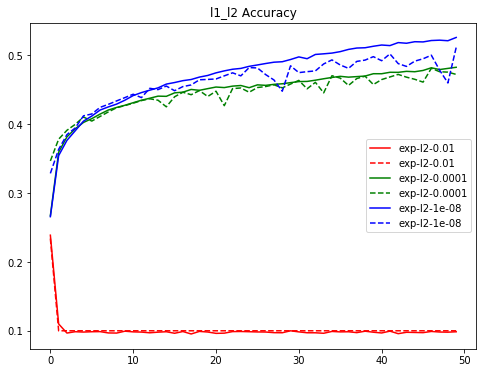

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("l1_l2 Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("l1_l2 Accuracy")
plt.legend()
plt.show()